# pH of rainwater (no simplification)

In [1]:
% input constants
KH=10^-1.5; Ka1=10^-6.3; Ka2=10^-10.3;PCO2=10^-3.5; Kw=10^-14;

ERROR: received unknown message
Message type: usage_request
ERROR: received unknown message
Message type: usage_request


# equations

$[H_2CO_3] = K_H*PCO_2$

$[HCO_3^-]=\dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]}$

$[CO_3^{2-}] = \dfrac{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}$

$[OH^-]=\dfrac {K_w} {[H^+]}$

# reactions
$[H_2CO_3] = [H^+] + [HCO_3^-]$

$[HCO_3^-] = [H^+] + [CO_3^{2-}]$

$ [H_2O] = [H^+] + [OH^-]$ 

# charge balance
$[H^+] = [HCO_3^-] + 2[CO_3^{2-}] +[OH^-]$

# polynomial

$[H^+] =\dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]} +\dfrac{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}+\dfrac {K_w} {[H^+]} $

# expansion
$[H^+]^3 -[{K_H*P_{CO_2}*K_{a1}-{K_w}}]{[H^+]} - {2K_H*P_{CO_2}*K_{a1}*K_{a2}}= 0  $

# for Ca
$[CaCO_3] = Ca^{2+} + CO_3^{2^-}$ 


$charge balance: 2[Ca^{2+}] + [H^+] = [OH^-] + [HCO_3^-] + 2[CO_3^{2-}]$

$[CO_3^{2-}] = \dfrac{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}$

$[OH^-]=\dfrac {K_w} {[H^+]}$

$[HCO_3^-]=\dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]}$

$ 2[Ca^{2+}] + [H^+] =\dfrac {K_w} {[H^+]} + \dfrac{K_H*P_{CO_2}*K_{a1}}{[H^+]} + \dfrac{2K_H*P_{CO_2}*K_{a1}*K_{a2}}{[H^+]^2}$ 

$ 2[Ca^{2+}] + [H^+] = 2[OH]^- $

In [2]:
# solve polynomial

a=1;
b=0;
c=-KH*PCO2*Ka1-Kw;
d=-2*KH*PCO2*Ka1*Ka2;

t=roots([a b c d]);
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);
display (pH)

% Simplified approach [H+]=[HCO3-]
Hconc = sqrt(KH*PCO2*Ka1)
pHsimple = -log10(sqrt(KH*PCO2*Ka1));
pHsimplestr=num2str(pHsimple);
display (pHsimple)

pH = 5.6496


Hconc = 2.2387e-06


pHsimple = 5.6500


In [3]:
# Ksp of Ca(OH)2


# solve polynomial for Ca

a=1;
b=Ka3;
c=-(Kw+KH*PCO2*Ka1);
d=-2*KH*PCO2*Ka1*Ka2;

t=roots([a b c d]);
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);
display (pH)


pH = 5.6496


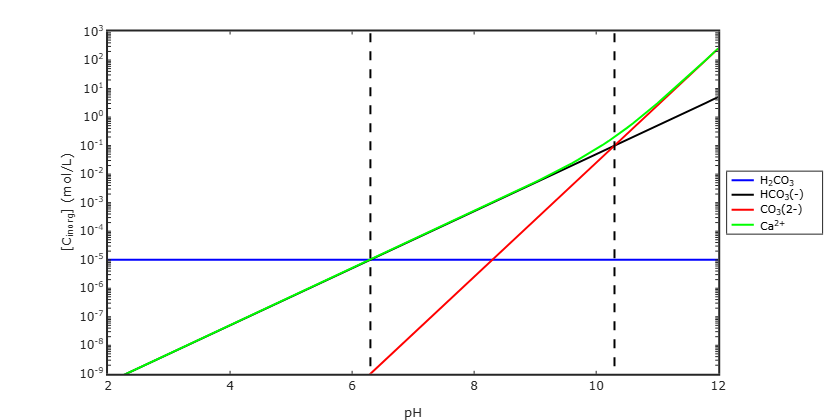

In [4]:
# graphing pH

graphics_toolkit ("plotly");
%graphics_toolkit ("notebook");
pH=2:0.1:12; H=10.^-pH; HCO3=(Ka1*KH*PCO2)./H;  CO3=(Ka2*Ka1*KH*PCO2)./(H.^2); 
H2CO3=ones(size(pH)).*(KH*PCO2); Ca=CO3 + HCO3 + Kw./(H);

h1=semilogy(pH,H2CO3,'b-','linewidth',2);
hold on
h2=semilogy(pH,HCO3,'k-','linewidth',2);
h3=semilogy(pH,CO3,'r-','linewidth',2);
h4=semilogy(pH,Ca,'g-','linewidth',2);
xlabel('pH'); ylabel('[C_{inorg}] (mol/L)')
legend('H_2CO_3','HCO_3(-)','CO_3(2-)','Ca^{2+}','location','eastoutside')
legend ("autoupdate", "off");
set(gca,'linewidth',2,'fontsize',12)

semilogy([-log10(Ka1) -log10(Ka1)],[1e-10 1e3],'k--','linewidth',2)
semilogy([-log10(Ka2) -log10(Ka2)],[1e-10 1e3],'k--','linewidth',2)

axis([2 12 1e-9 1e3])


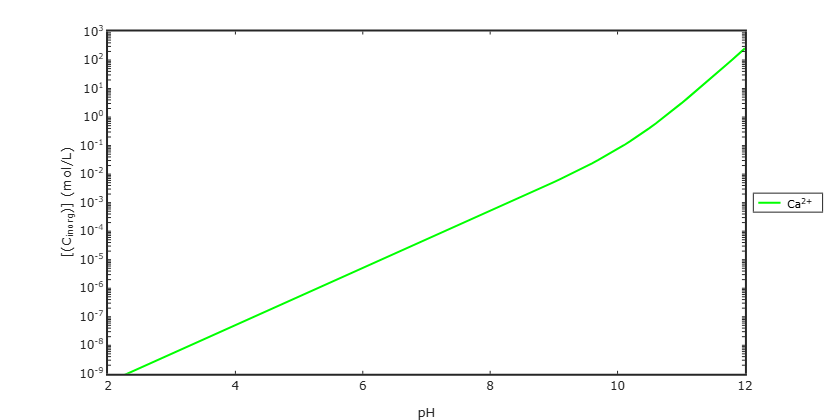

Execution exception: 'mol_L' undefined near line 2, column 7

The Ca concentration at pH 12.0 is 2.56e+02 mol/L.


ERROR: received unknown message
Message type: usage_request


In [5]:
# graphing pH

graphics_toolkit ("plotly");
%graphics_toolkit ("notebook");
pH=2:0.1:12; H=10.^-pH; HCO3=(Ka1*KH*PCO2)./H;  CO3=(Ka2*Ka1*KH*PCO2)./(H.^2); 
H2CO3=ones(size(pH)).*(KH*PCO2); Ca=CO3 + HCO3 + Kw./(H);

%h1=semilogy(pH,(H2CO3),'b-','linewidth',2);
%h2=semilogy(pH,(HCO3),'k-','linewidth',2);
%h3=semilogy(pH,(CO3),'r-','linewidth',2);
h4=semilogy(pH,(Ca),'g-','linewidth',2);
xlabel('pH'); ylabel('[(C_{inorg})] (mol/L)')
legend('Ca^{2+}','location','eastoutside')
legend ("autoupdate", "off");
set(gca,'linewidth',2,'fontsize',12)

axis([2 12 1e-9 1e3])

% Find the concentration at pH = 12
pH_target = 12;                               % Target pH
[~, idx] = min(abs(pH - pH_target));         % Find closest pH index
Ca_target = Ca(idx);                         % Get Ca concentration

% Convert to ppm
ppm = mol_L * molar_mass * 1000;

% Display the result
fprintf('The Ca concentration at pH %.1f is %.2e mol/L.\n', pH_target, Ca_target);
